# Copy Folder Content From One Organization to Another
### This Notebook contains samples for connecting to either ArcGIS Online or Portal for ArcGIS as the source GIS from which copied data will originate. A destination GIS will also be required as the location where the cloned items will be placed. Only run the code block that applies for your scenario.  

### Connecting to ArcGIS Online or Portal for ArcGIS as the source GIS.

##### You will be prompted to input the url, username, and password for the Source AGOL Organization or Portal Account. 

In [ ]:
from arcgis.gis import GIS
from IPython.display import display
from getpass import getpass
import IPython
import datetime

uriS = input("What is the soure AGOL or Portal url: ")
unS = input("What is the source GIS Username: ")

def authSource():
    global sourceOrg
    sourceOrg = GIS(uriS, unS)
    print("Logged in as: " + sourceOrg.properties.user.username)
authSource()

### To use government.maps.arcgis.com as the destination GIS, run the cell below otherwise skip to the next code block.

#### After running the next cell, a browser window will launch requesting an authentication string via SAML as Enterprise Logins are enforced in government.maps.arcgis.com. Copy the string and paste it directly into the notebook.

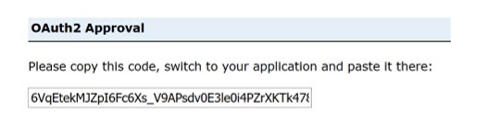

In [ ]:
destOrg = GIS("https://government.maps.arcgis.com", client_id = "YaMKYbXuSkd02G9i")
print("Logged in as: " + destOrg.properties.user.username)

orig_userid = unS
new_userid  =  unS

sourceUser = sourceOrg.users.get(orig_userid)
newUser = destOrg.users.get(new_userid)

source_user = sourceOrg.users.search(orig_userid)
dest_user = destOrg.users.search(new_userid)

### Connecting to ArcGIS Online or Portal for ArcGIS as the Destination GIS. 

##### You will be prompted to input the url, username, and password for the Destination AGOL Organization or Portal Account. 

In [ ]:
uriD = input("What is the destination AGOL or Portal url: ")
unD = input("What is the destination GIS Username: ")

def authDest():
    global destOrg
    destOrg = GIS(uriD, unD)
    print("Logged in as: " + destOrg.properties.user.username)
authDest()

orig_userid = unS
new_userid  =  unD

sourceUser = sourceOrg.users.get(orig_userid)
newUser = destOrg.users.get(new_userid)

source_user = sourceOrg.users.search(orig_userid)
dest_user = destOrg.users.search(new_userid)

#### This function will search for folders within your source organization and output these to the Jupyter console. Consult this output list to determine the folder 'title' you wish to copy.

In [ ]:
def folderRepo():
    global f, foldContent
    foldContent = source_user[0].folders
    print(type(foldContent))
    for folder in foldContent: 
        print(str(folder) + '\n')
folderRepo()

#### You will be prompted for the folder name in the source GIS to copy/clone. A folder with the exact name and content will be cloned into the destination GIS.

In [ ]:
title = input("What is the folder name: ") 
        
def copyFolders():
    for folder in foldContent:
        global folder_items
        folder_items = source_user[0].items(title)
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print("The copy operation for the following folder: {} has started @ {}".format(title, current_time) + '\n')
    for items in folder_items:
        destOrg.content.clone_items(folder_items, folder=title, copy_data=True)
        print("Item {} has been copied.".format(items) + '\n')
             
try:
    copyFolders()
    print("Folder {} has been copied successfully!".format(str(folder['title'])))
    print("Skynet has now become self-aware.")
except:
    print("There was an error with the copy operation")


In [ ]:
IPython.display.IFrame(r'https://survey123.arcgis.com/share/7cd400baf8ec450eaf22d0e5db04dbfc?portalUrl=https://thepisgahgeo.maps.arcgis.com', 800, 700)
